In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.options.display.max_columns = 30

# Load data

In [2]:
windows = 3

In [3]:
data = pd.read_excel('data/ft_load_sul_15y_days.xlsx')
data = data[['Data Escala de Tempo 1 CE Simp 4', 'Selecione Tipo de CE Simp 4']]
data.columns = ['date','load']
data = data[2:]
data.shape

(5995, 2)

In [4]:
data.iloc[np.r_[0:2, -2:0]]

,date,load
2,2005-01-01 00:00:00,134.95552
3,2005-02-01 00:00:00,140.24240
5995,05/30/2021 12:00:00 a.m.,209.56636
5996,05/31/2021 12:00:00 a.m.,276.47700


In [5]:
init_date = datetime(2005, 1, 1)
datelist = pd.date_range(init_date, periods=len(data)).tolist()

In [6]:
df = pd.DataFrame(data=data.load.values, index=datelist, columns=['Energy_Load'])
df.iloc[np.r_[0:2, -2:0]]

,Energy_Load
2005-01-01,134.95552
2005-01-02,140.24240
2021-05-30,209.56636
2021-05-31,276.47700


In [7]:
df.loc['2014-02-01','Energy_Load'] = (325.547854 + 248.323577)/2.

In [16]:
df.describe()

,Energy_Load
count,5995.000000
mean,234.386231
std,43.945590
min,129.932870
25%,202.386787
50%,231.525349
75%,266.481096
max,375.487107


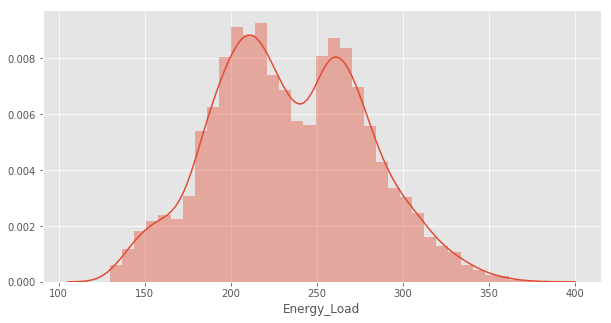

In [15]:
plt.figure(figsize=[10,5])
sns.distplot(df.Energy_Load)
plt.show()

### Month

In [19]:
df1 = df.resample('1M').sum()[['Energy_Load']]
df1['date'] = df1.index
df1['year'] = df1.date.dt.year
df1['month'] = df1.date.dt.month
df1.shape

(197, 4)

In [20]:
df1.describe()

,Energy_Load,year,month
count,197.000000,197.000000,197.000000
mean,7132.718052,2012.715736,6.411168
std,1040.642621,4.755277,3.468293
min,5183.659522,2005.000000,1.000000
25%,6189.115470,2009.000000,3.000000
50%,7295.007458,2013.000000,6.000000
75%,7867.156528,2017.000000,9.000000
max,9614.946489,2021.000000,12.000000


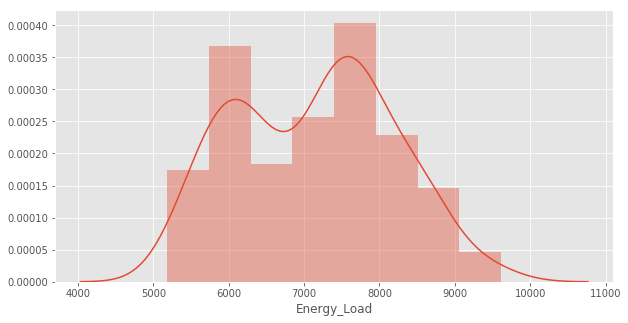

In [21]:
plt.figure(figsize=[10,5])
sns.distplot(df1.Energy_Load)
plt.show()

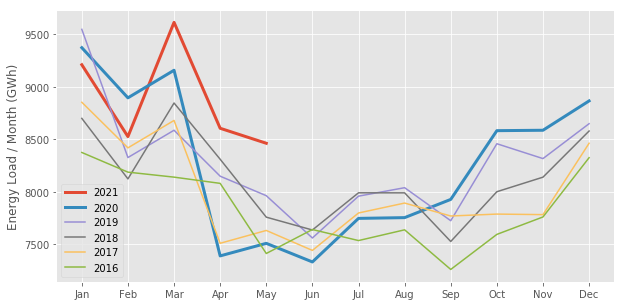

In [33]:
tmp = df1.reset_index(drop=False)
plt.figure(figsize=[10,5])
plt.plot(tmp[tmp.year==2021].Energy_Load.values, label='2021', linewidth=3)
plt.plot(tmp[tmp.year==2020].Energy_Load.values, label='2020', linewidth=3)
plt.plot(tmp[tmp.year==2019].Energy_Load.values, label='2019')
plt.plot(tmp[tmp.year==2018].Energy_Load.values, label='2018')
plt.plot(tmp[tmp.year==2017].Energy_Load.values, label='2017')
plt.plot(tmp[tmp.year==2016].Energy_Load.values, label='2016')

plt.xticks([i for i in range(12)], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Energy Load / Month (GWh)')
plt.legend()
# plt.savefig('imgs/fig2.png')
plt.savefig('imgs/months.svg', format='svg', dpi=1200)
plt.show()

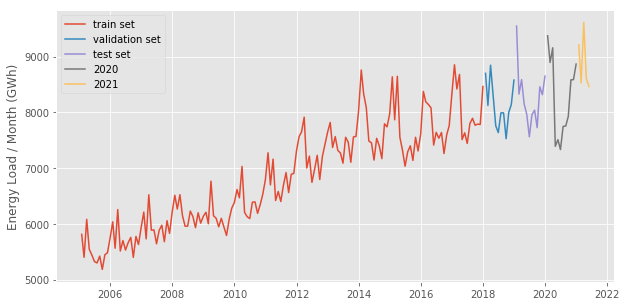

In [34]:
plt.figure(figsize=[10,5])
plt.plot(df1.loc['2005-01-01':'2017-12-31','Energy_Load'], label="train set")
plt.plot(df1.loc['2018-01-01':'2018-12-31','Energy_Load'], label="validation set")
plt.plot(df1.loc['2019-01-01':'2019-12-31','Energy_Load'], label="test set")
plt.plot(df1.loc['2020-01-01':'2020-12-31','Energy_Load'], label="2020")
plt.plot(df1.loc['2021-01-01':'2021-12-31','Energy_Load'], label="2021")
plt.legend()
plt.ylabel('Energy Load / Month (GWh)')
plt.savefig('imgs/years_split.svg', format='svg', dpi=1200)
plt.show()